In [1]:
%%capture
%run EOMs.ipynb

In [18]:
dTh, Phi, th, phi, Dom, alpha0 = symbols(r"\delta\Theta Phi theta phi \Delta\omega_{ext} alpha_0")

In [19]:
Dom

In [220]:
params = {
    j: 2,
    mup: 1e-3,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 0,  # 12.08476062046314,
    b2_3_2: 0,  # 10.485706741948807,
    ep: 0.03,
    np: 1,
    omp: 0.0,
    om: 0.0,
}
params[alpha0] = (params[j] / (params[j] + 1)) ** (2.0 / 3)
params[Dom] = params[omp] - params[om]

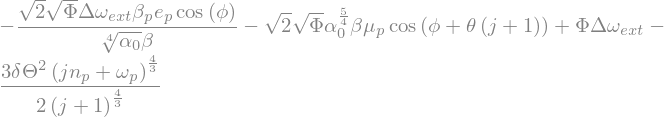

In [221]:
H_full = -Rational(3,2)*((j*np + omp)/(j+1))**Rational(4,3)*dTh**2 + Dom*Phi - bp/b/alpha0**Rational(1,4)*ep*Dom*sqrt(2*Phi)*cos(phi) - alpha0**Rational(5,4)*b*mup*sqrt(2*Phi)*cos((j+1)*th+phi)
H_full

In [266]:
H_plug = H_full.subs(params).evalf()
H_plug

In [223]:
print(params[mup]**(2./3))
print(params[mup]**(4./3))

0.010000000000000002
0.00010000000000000006


In [224]:
arg = [Phi, dTh, phi, th]
display(arg)
funs = [
    -H_plug.diff(phi),
    -H_plug.diff(th),
    H_plug.diff(Phi),
    H_plug.diff(dTh),
]
funs
_funs = [lambdify(arg, _f) for _f in funs]
def rhs(t, Y):
    return(_funs[0](*Y),_funs[1](*Y),_funs[2](*Y),_funs[3](*Y))

In [225]:
0.03**2

In [251]:
initconds = {
    Phi: 0.001,
    dTh: 0.0,
    phi: npy.pi,
    th: 0,
}
y0 = [float(a.subs(initconds)) for a in arg]
_H_plug = lambdify(arg,H_plug)
_H_plug(*y0)

In [252]:
rhs(0,y0)

In [264]:
def event_th_pi2(t,Y):
    return(Y[3]%(2*npy.pi)-npy.pi)
teval = npy.linspace(0, 2 * npy.pi * 2e4, 10000)
sol = sp.integrate.solve_ivp(
    rhs,
    [teval[0], teval[-1]],
    y0,
    t_eval=teval,
    rtol=1e-12,
    atol=1e-12,
    method="DOP853",
    events=[event_th_pi2]
)

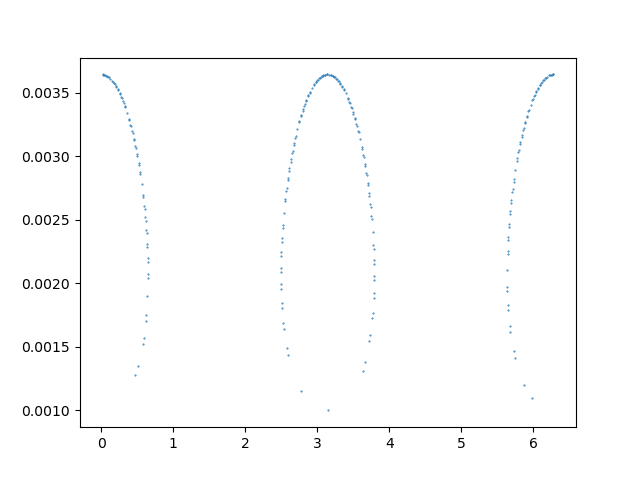

In [265]:
plt.clf()
plt.scatter(sol.y_events[0][:,2]%(2*npy.pi),sol.y_events[0][:,0],s=0.2)
#plt.scatter(sol.t, sol.y[0],s=0.2)
#plt.scatter(sol.t, sol.y[3]%(2*npy.pi),s=0.2)
plt.show()

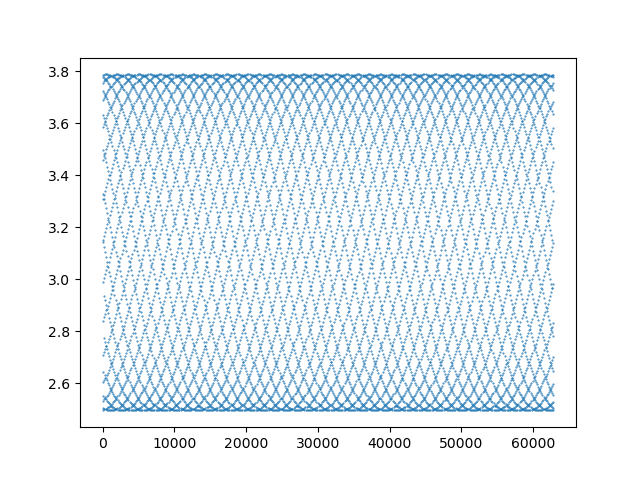

In [255]:
plt.clf()
plt.scatter(sol.t, (sol.y[2,:]+(params[j]+1)*sol.y[3])%(2*npy.pi),s=0.2)
#plt.scatter(sol.t, sol.y[3]%(2*npy.pi),s=0.2)
plt.show()

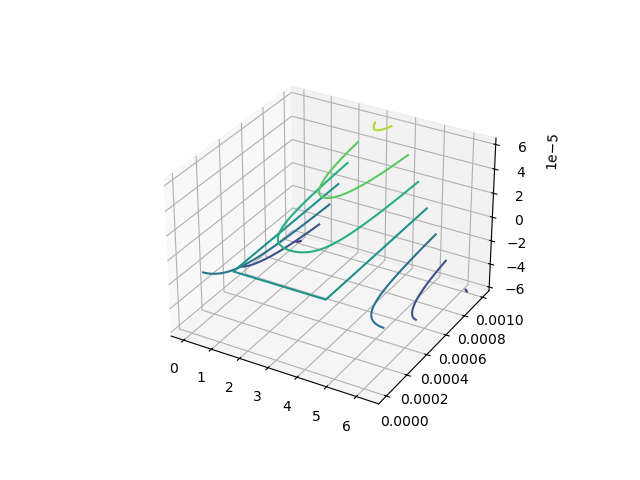

In [184]:
plt.clf()
_1, _2 = npy.meshgrid(npy.linspace(0,2*npy.pi,1000),npy.linspace(0,0.001,1000))
plt.figure().add_subplot(111,projection="3d").contour3D(_1,_2,_H_plug(_2,0,_1,0),cmap="viridis")
plt.show()